Задача №1

Тест на Гетероск для OLS :  (26.12420812642011, 8.983017238943363e-06, 16.777294482744804, 1.6753464609689465e-07)
Тест на Гетероск для OLS (White):  (48.85489538486539, 6.778199696813047e-08, 218.6536806665486, 4.228765937108497e-31)


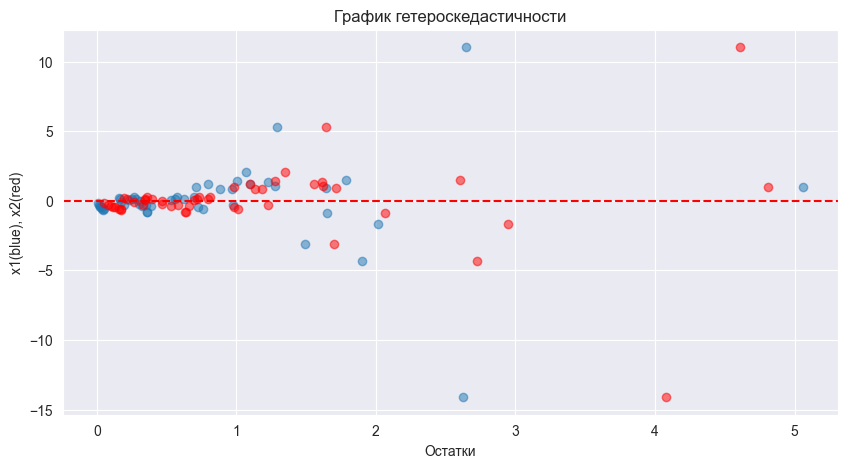

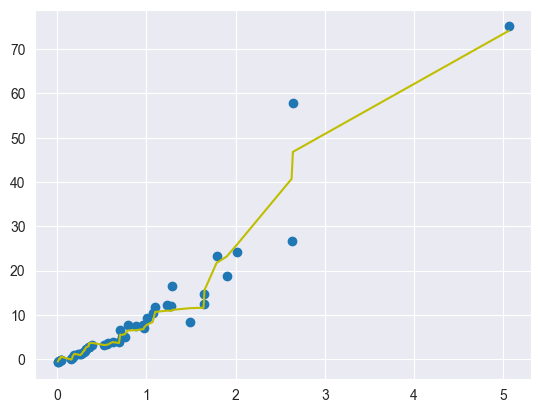

Тест на Гетероск для WLS :  (37.62365856857283, 3.3955606976350225e-08, 46.612813750155695, 5.4300500134665465e-14)
Тест на Гетероск для WLS (White):  (49.8417463746047, 4.383130303444173e-08, 1614.111206184382, 1.0751395928768736e-48)


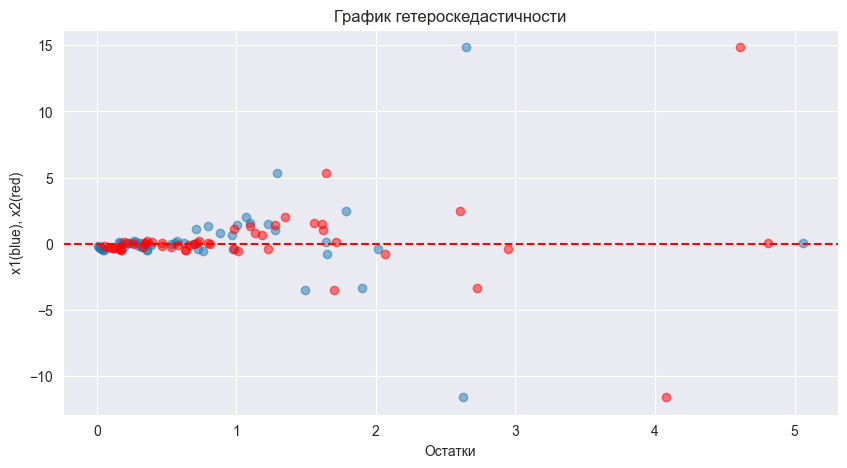

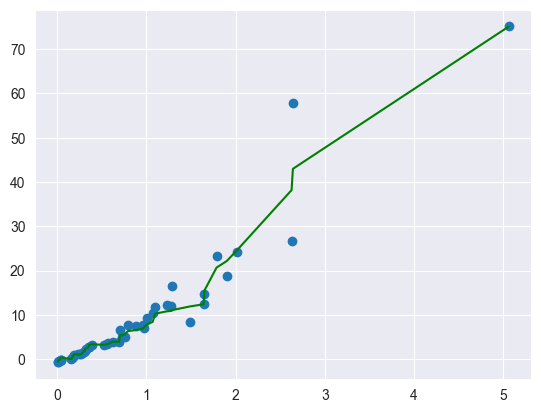

# ---------------------------------------------------------------------------------------------
 # ----------------------------------- OLS_new --------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
Тест на Гетероск для OLS_new :  (2.948603308006886, 0.3996176074533252, 0.960904894819686, 0.41924458599539893)
Тест на Гетероск для OLS_new (White):  (4.203194829184776, 0.8383408158793823, 0.47036847699803236, 0.8698190921815948)


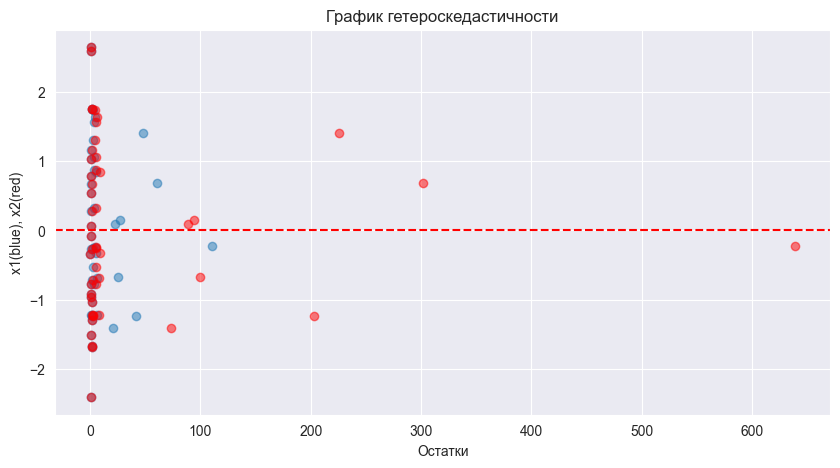

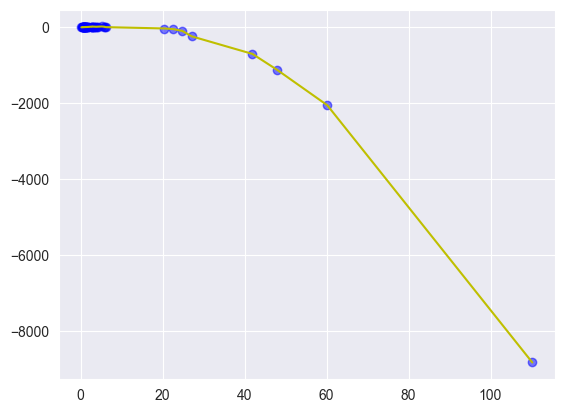

Тест на Гетероск для WLS_new :  (2.948860463676489, 0.39957727869791726, 0.9609939501705975, 0.41920310829231033)
Тест на Гетероск для WLS_new (White):  (4.191461136004393, 0.8394490811258465, 0.4689352434007939, 0.8707945768298715)


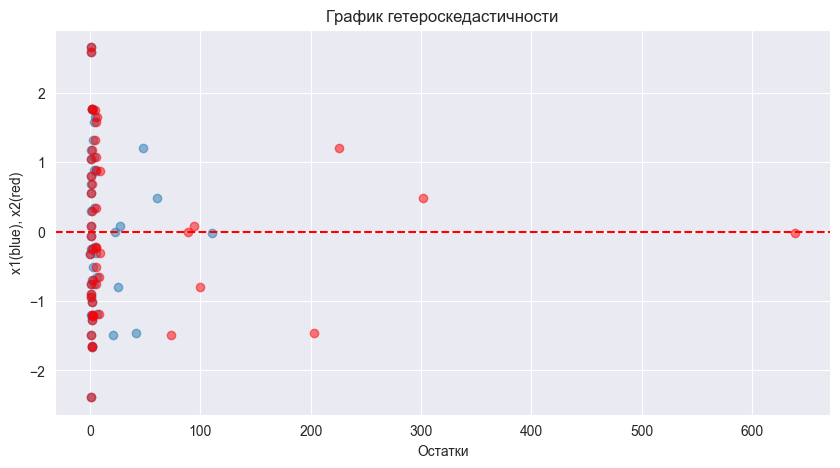

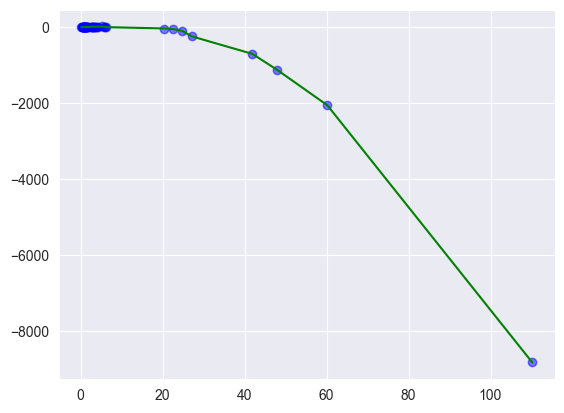

In [13]:
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv

X0 = np.ones(50)
X1 = np.random.exponential(1, 50)
X1.sort()
X2 = np.random.exponential(1, 50)
X2.sort()
X1_2 = X1**2
delta = np.random.normal(0,1,size=X1.shape)
eps =delta*X1_2

Y = - X0 + X1 +2*X1_2 + 5*X2 + eps


# ---------------------------------------------------------------------------------------------
# ----------------------------------- OLS ---------------------------------------------------  
# ---------------------------------------------------------------------------------------------


Xmat =  sm.add_constant(np.column_stack((X0, X1, X1_2, X2)))
model = sm.OLS(Y, Xmat).fit()

test01 = ssa.het_breuschpagan(model.resid**2, Xmat)
print("Тест на Гетероск для OLS : ",test01)

test02 = ssa.het_white(model.resid**2, Xmat)
print("Тест на Гетероск для OLS (White): ",test02)

b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X1, model.resid, alpha=0.5)
plt.scatter(X2, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1 + b[2]*X1_2 + b[3]*X2

plt.scatter(X1, Y)
plt.plot(X1, Yplt, color='y')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- WLS ---------------------------------------------------  
# ---------------------------------------------------------------------------------------------

weight = 1/(model.resid**2)
model_W = sm.WLS(Y, Xmat, weights= weight).fit()

test01 = ssa.het_breuschpagan(model_W.resid**2, Xmat)
print("Тест на Гетероск для WLS : ",test01)
test02 = ssa.het_white(model_W.resid**2, Xmat)
print("Тест на Гетероск для WLS (White): ",test02)

b = model_W.params
plt.figure(figsize=(10, 5))
plt.scatter(X1, model_W.resid, alpha=0.5)
plt.scatter(X2, model_W.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1 + b[2]*X1_2 + b[3]*X2

plt.scatter(X1, Y)
plt.plot(X1, Yplt, color='g')
plt.show()

print("# ---------------------------------------------------------------------------------------------\n # ----------------------------------- OLS_new --------------------------------------------------- \n# ---------------------------------------------------------------------------------------------")
Ynew = Y/X1_2
X1_2new = 1/X1_2
X1new = 1/X1
X2new = X2/X1_2

Xmat_new =  sm.add_constant(np.column_stack((X0, X1new, X1_2new, X2new)))
model_OLS_new = sm.OLS(Ynew, Xmat_new).fit()

test01 = ssa.het_breuschpagan(model_OLS_new.resid**2, Xmat_new)
print("Тест на Гетероск для OLS_new : ",test01)
test02 = ssa.het_white(model_OLS_new.resid**2, Xmat_new)
print("Тест на Гетероск для OLS_new (White): ",test02)

b = model_OLS_new.params
plt.figure(figsize=(10, 5))
plt.scatter(X1new, model_OLS_new.resid, alpha=0.5)
plt.scatter(X2new, model_OLS_new.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1new + b[2]*X1_2new + b[3]*X2new

plt.scatter(X1new , Ynew, color = 'b', alpha=0.5)
plt.plot(X1new, Yplt, color='y')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- WLS_new ------------------------------------------------- 
# ---------------------------------------------------------------------------------------------

weight = 1/(model_OLS_new.resid**2)
model_WLS_new = sm.WLS(Ynew, Xmat_new, weights= weight).fit()

test01 = ssa.het_breuschpagan(model_WLS_new.resid**2, Xmat_new)
print("Тест на Гетероск для WLS_new : ",test01)
test02 = ssa.het_white(model_WLS_new.resid**2, Xmat_new)
print("Тест на Гетероск для WLS_new (White): ",test02)

b = model_WLS_new.params
plt.figure(figsize=(10, 5))
plt.scatter(X1new, model_WLS_new.resid, alpha=0.5)
plt.scatter(X2new, model_WLS_new.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1new + b[2]*X1_2new + b[3]*X2new

plt.scatter(X1new, Ynew, color = 'b', alpha=0.5)
plt.plot(X1new, Yplt, color='g')
plt.show()

Задача №2

Тест на Гетероск для OLS :  (1.9031222922321955, 0.1677292511958005, 1.9012428223695306, 0.1710783956244066)
Тест на Гетероск для OLS (White):  (34.90640547990379, 2.631299956207703e-08, 26.008099233983305, 9.049098865722401e-10)
Coefficients : [1.57515527 0.33012671]


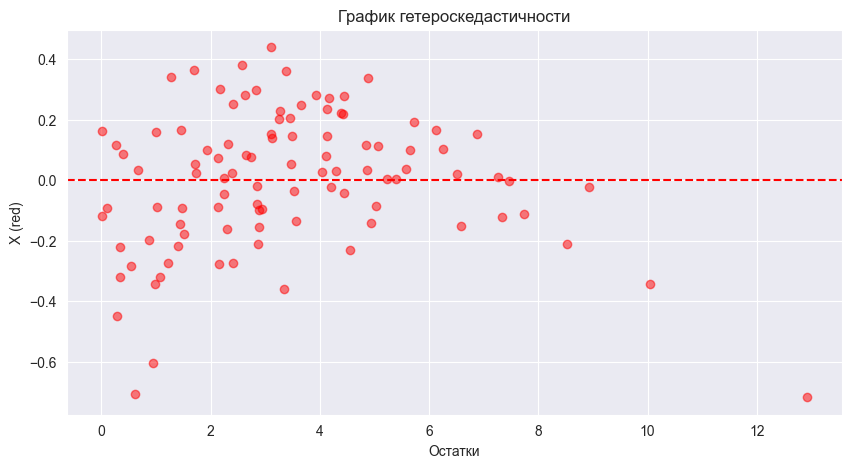

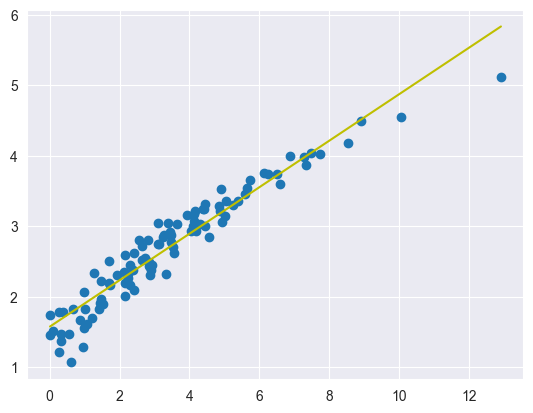

Тест на Гетероск для OLS boxcox :  (12.960894514604737, 0.00031806517381910806, 14.593068889527958, 0.00023412832419119443)
Тест на Гетероск для OLS (White) boxcox:  (22.761544216922214, 1.1412833290747107e-05, 14.292555221729188, 3.630184907360994e-06)
Coefficients : [0.74791241 0.37641176]


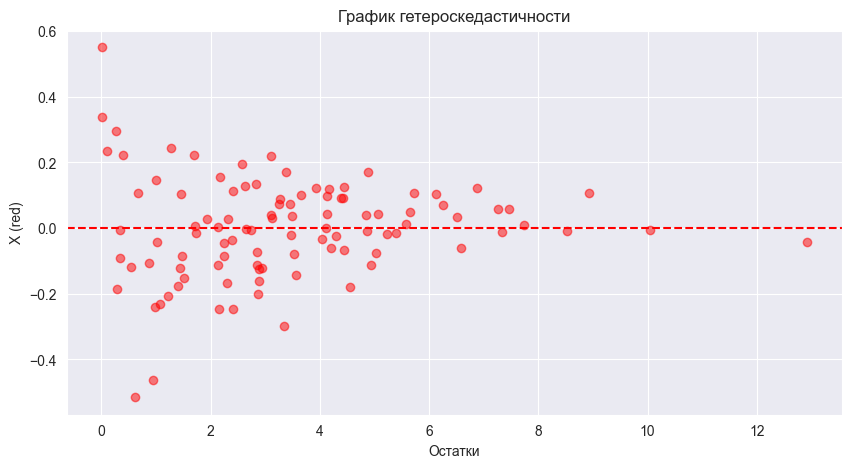

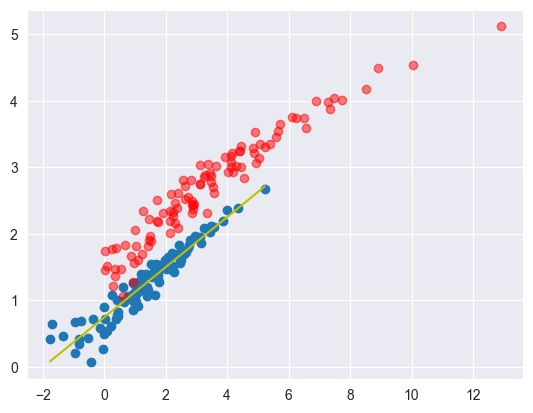

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1028.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           9.21e-54
Time:                        21:56:20   Log-Likelihood:                 44.594
No. Observations:                 100   AIC:                            -85.19
Df Residuals:                      98   BIC:                            -79.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7479      0.023     32.338      0.0

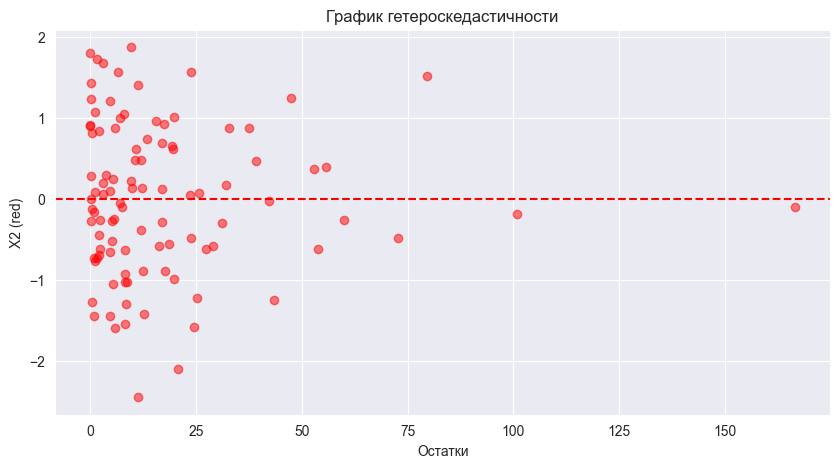

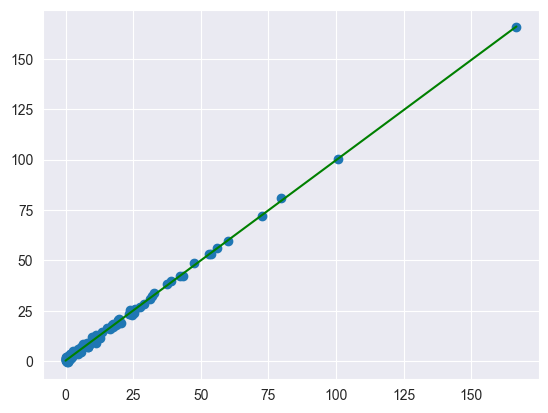

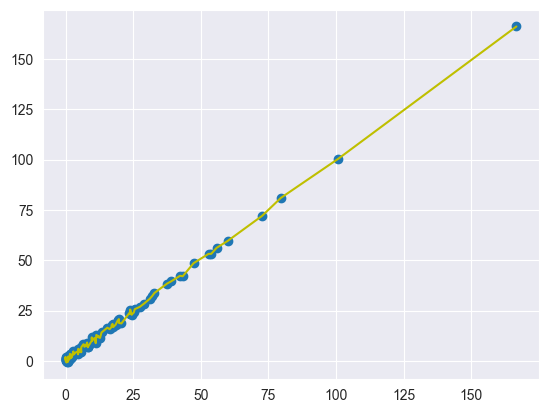

Тест на Гетероск для OLS boxcox :  (16.019328380396647, 6.269911199782813e-05, 18.69351781788341, 3.6922256687211325e-05)
Тест на Гетероск для OLS (White) boxcox:  (35.712681062864604, 1.7582873039799443e-08, 26.94256130423897, 4.943991741018011e-10)
Coefficients : [0.55695203 0.77502676]


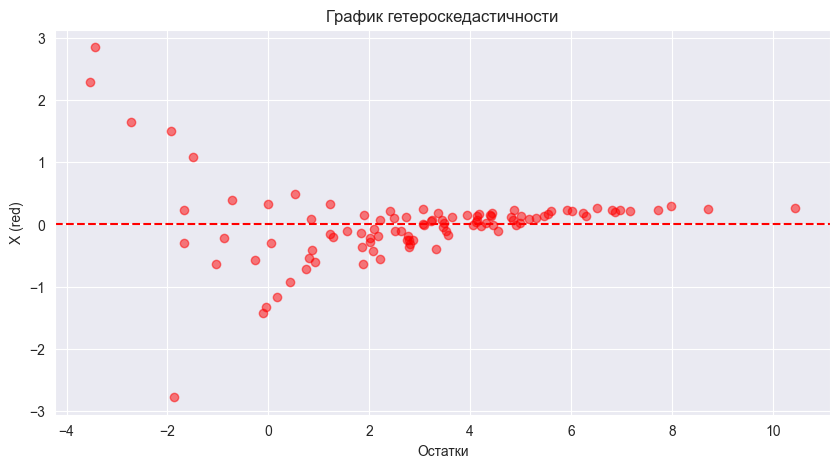

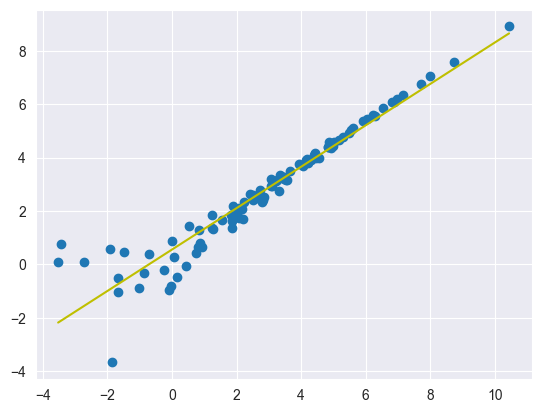

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1028.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           9.21e-54
Time:                        21:56:21   Log-Likelihood:                 44.594
No. Observations:                 100   AIC:                            -85.19
Df Residuals:                      98   BIC:                            -79.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7479      0.023     32.338      0.0

In [51]:
X0 = np.ones(100)
X = np.random.chisquare(3,100)
X.sort()
X2 = X**2
eps = np.random.normal(0,1,size=X.shape)

Y = np.sqrt(abs(2*X + X0 + eps))
Y2 = X2 + eps

# ---------------------------------------------------------------------------------------------
# ----------------------------------- X&Y ----------------------------------------------------- 
# ---------------------------------------------------------------------------------------------

Xmat =  sm.add_constant(np.column_stack((X0, X)))
model = sm.OLS(Y, Xmat).fit()

test01 = ssa.het_breuschpagan(model.resid**2, Xmat)
print("Тест на Гетероск для OLS : ",test01)

test02 = ssa.het_white(model.resid**2, Xmat)
print("Тест на Гетероск для OLS (White): ",test02)


b = model.params
print("Coefficients :", b)

plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()
Yplt = b[0] + b[1]*X

plt.scatter(X, Y)
plt.plot(X, Yplt, color='y')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- X&Y BoxCox ----------------------------------------------
# ---------------------------------------------------------------------------------------------

transformed_Y, lambda_Y = sps.boxcox(Y)
transformed_X, lambda_X = sps.boxcox(X)
# transformed_X0, lambda_X0 = sps.boxcox(X0)
# transformed_epsilon, lambda_epsilon = sps.boxcox(eps)
Xmat =  sm.add_constant(np.column_stack((X0, transformed_X)))

model_boxcox = sm.OLS(transformed_Y, Xmat).fit()

test01 = ssa.het_breuschpagan(model_boxcox.resid**2, Xmat)
print("Тест на Гетероск для OLS boxcox : ",test01)

test02 = ssa.het_white(model_boxcox.resid**2, Xmat)
print("Тест на Гетероск для OLS (White) boxcox: ",test02)


b = model_boxcox.params
print("Coefficients :", b)

plt.figure(figsize=(10, 5))
plt.scatter(X, model_boxcox.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()
Yplt = b[0] + b[1]*transformed_X

plt.scatter(transformed_X, transformed_Y)
plt.scatter(X, Y, color = 'r', alpha=0.5)
plt.plot(transformed_X, Yplt, color='y')
plt.show()

print(model_boxcox.summary())
print('Lambda for Y:', lambda_Y)
print('Lambda for X:', lambda_X)
# print('Transformed epsilon:', transformed_epsilon)
# print('Lambda epsilon', lambda_epsilon)


# ---------------------------------------------------------------------------------------------
# ----------------------------------- X2&Y2 ---------------------------------------------------
# ---------------------------------------------------------------------------------------------

Xmat =  sm.add_constant(np.column_stack((X0, X2)))
model = sm.OLS(Y2, Xmat).fit()

test01 = ssa.het_breuschpagan(model.resid**2, Xmat)
print("Тест на Гетероск для OLS : ",test01)

test02 = ssa.het_white(model.resid**2, Xmat)
print("Тест на Гетероск для OLS (White): ",test02)

b = model.params
print("Coefficients :", b)
plt.figure(figsize=(10, 5))
plt.scatter(X2, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X2 (red)')
plt.show()
Yplt = b[0]+b[1]*X2

plt.scatter(X2, Y2)
plt.plot(X2, Yplt, color='g')
plt.show()

plt.scatter(X2, Y2)
plt.plot(X2, Y2, color='y')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- X2&Y2 BoxCox ----------------------------------------------
# ---------------------------------------------------------------------------------------------

transformed_Y2, lambda_Y2 = sps.boxcox(abs(Y2))
transformed_X2, lambda_X2 = sps.boxcox(X2)
# transformed_epsilon, lambda_epsilon = sps.boxcox(eps)
Xmat =  sm.add_constant(np.column_stack((X0, transformed_X2)))

model_boxcox2 = sm.OLS(transformed_Y2, Xmat).fit()

test01 = ssa.het_breuschpagan(model_boxcox2.resid**2, Xmat)
print("Тест на Гетероск для OLS boxcox : ",test01)

test02 = ssa.het_white(model_boxcox2.resid**2, Xmat)
print("Тест на Гетероск для OLS (White) boxcox: ",test02)


b = model_boxcox2.params
print("Coefficients :", b)

plt.figure(figsize=(10, 5))
plt.scatter(transformed_X2, model_boxcox2.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()
Yplt = b[0] + b[1]*transformed_X2

plt.scatter(transformed_X2, transformed_Y2)
# plt.scatter(X2, Y2, color = 'r', alpha=0.5)
plt.plot(transformed_X2, Yplt, color='y')
plt.show()

print(model_boxcox.summary())
print('Lambda for Y2:', lambda_Y2)
print('Lambda for X2:', lambda_X2)
# print('Transformed epsilon:', transformed_epsilon)
# print('Lambda epsilon', lambda_epsilon)

Задача №3

In [ ]:
f = open('SLEEP75.txt')
lines = f.readlines()
f.close()

